<a href="https://colab.research.google.com/github/negar67/Python/blob/master/SupervisedLearningClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd #SVM (Support Vector Machines) to build and train a model using human cell records, and classify cells to whether the samples are benign or malignant
import numpy as np #Numpy provides fast mathematical function processing
import scipy.optimize as opt #Algorithm library used for high level plotting
from sklearn import preprocessing #This is a library used to make SciKit learn algorithms operate smoother
from sklearn import metrics # Import SCiKit-learn metrics module for accuracy calculation 
from sklearn.model_selection import train_test_split #has replaced "import sklearn.cross_validation as cross_validation"
import matplotlib.pyplot as plt #Machine Learning library to create plots and data visualizations
%matplotlib inline

In [0]:
#Here, we are importing data from a csv file
#cancerData is the dataframe
cancerData = pd.read_csv('http://raw.githubusercontent.com/TERRENCEDATAEXPERT/DataSets/master/Cancer_Data.csv')

In [5]:
#This shows the entire dataset in rows and columns
cancerData.shape

(699, 11)

In [11]:
#This is the dataframe
#Now we want to preview our data using the code below
#The number of rows and columns are displayed at bottom
cancerData.head()
#ID = Patient number
#Clump = Clump thickness
#UnifSize = Uniformity of cell size
#UnifShape = Uniformity of cell shape
#MargAdh = Marginal adhesion
#SingEpiSize = Single epithelial cell size
##BareNuc = Bare nuclei
#BlandChrom = Bland chromatin
#NormalNucl = Normal nucleoi
#Mit = Mitoses
#Class = Benign or malignant

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


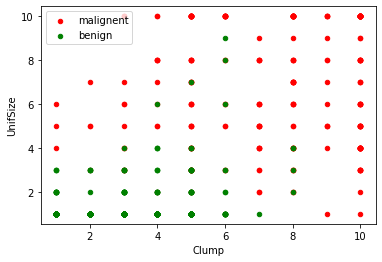

In [6]:
#Lets compare 2 columns to see what the data shows us
verdict = cancerData[cancerData['Class'] == 4][0:683].plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='malignent');
cancerData[cancerData['Class'] == 2][0:683].plot(kind='scatter', x='Clump', y='UnifSize', color='green', label='benign', ax=verdict);

In [7]:
#code to show us the different datatypes
cancerData.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [8]:
#check dataframe again
cancerData

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [9]:
#Barenuc should be an integer based on the data set
#Extended code to make that change
cancerData = cancerData[pd.to_numeric(cancerData['BareNuc'], errors='coerce').notnull()] 
cancerData['BareNuc'] = cancerData['BareNuc'].astype('int')
cancerData.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [0]:
#We will setup our model to be trained and tested
#Columns are the features
#Values in the columns are the Attributes
cancerData_features_columns = cancerData[['Clump', 'UnifSize', 'UnifShape','MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

#Here the Numpy library is used
#We are setting up the X (independent variables)
x = np.asarray(cancerData_features_columns)

In [12]:
#y variable is dependent variable
#The Y is the dependent variable that we are looking for
cancerData['Class'] = cancerData['Class'].astype('int')
y = np.asarray(cancerData['Class'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, train_size=0.70, test_size = 0.30, random_state = 0, shuffle= True )


In [14]:
print('Train set:', xtrain.shape, ytrain.shape)
print('Train set:', xtrain.shape, ytrain.shape)

Train set: (478, 9) (478,)
Train set: (478, 9) (478,)


In [15]:
#Modeling (SVM with Scikit-learn)
#The SVM algorithm offers a choice of kernel functions for performing its processing.
#Basically, mapping data into a higher dimension for better accuracy is "kernelling".
#The mathematical function used for the transformation is known as the kernel function (1. linear 2. Polynomial 3. Radial basis function (RBF) 4. Sigmoid)

from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
#Implement yhat function to sample arrays
yhat = clf.predict(xtest)
yhat [0:5]

array([2, 2, 4, 4, 2])

In [0]:
from sklearn.metrics import classification_report, confusion_matrix #This will import confusion matrix library
import itertools
#itertools is an additional library frequently used in healthcare modeling/analysis because of speed and efficient looping

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() /2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True')
  plt.xlabel('Predicted')


              precision    recall  f1-score   support

           2       0.97      0.95      0.96       130
           4       0.92      0.95      0.93        75

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205

[[124   6]
 [  4  71]]


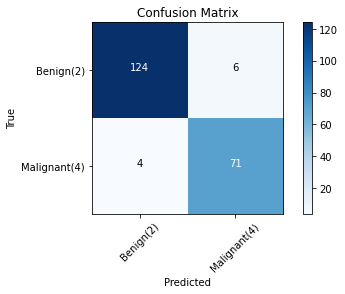

In [20]:
cnf_matrix = confusion_matrix(ytest, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print(classification_report(ytest, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)', 'Malignant(4)'], normalize=False, title='Confusion Matrix')

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, yhat)

0.9512195121951219

In [25]:
from sklearn.metrics import f1_score
f1_score(ytest, yhat, average='weighted')

0.9513513647988376